# Chapter 5 - Least Squares

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

plt.rcParams['text.usetex'] = True
%matplotlib notebook

In [27]:
def least_squares(data,quiet=False):
    n_data = len(data)
    
    X_avg = 0
    Y_avg = 0
    for i in range(n_data):
        if not quiet: print(data[i])
        X_avg += data[i][0]
        Y_avg += data[i][1]
    
    X_avg = X_avg/float(n_data)
    Y_avg = Y_avg/float(n_data)
    if not quiet: print(X_avg,Y_avg)
    
    m_num=0
    m_den=0
    for i in range(n_data):
        m_num += data[i][0] * (data[i][1] - Y_avg)
        m_den += data[i][0] * (data[i][0] - X_avg)
    
    m = float(m_num)/m_den
    
    b = 0
    for i in range(n_data):
        b += data[i][1] - m * data[i][0]
    b = b/float(n_data)
        
    return m, b

In [28]:
def p_lagrange(xarray,yfunc):
    Ck = []
    for k in range(len(xarray)):
        Ckj=1
        for j in range(len(xarray)):
            if j==k: continue
            Ckj = Ckj*(xarray[k]-xarray[j])
            #print(k,j)
        
        #print(k, xarray[k], yfunc(xarray[k]), yfunc(xarray[k])/Ckj)
        Ck.append(yfunc(xarray[k])/Ckj)
    return Ck

In [29]:
def p_lagrange_points(xpoints,ypoints):
    Ck = []
    for k in range(len(xpoints)):
        Ckj=1
        for j in range(len(xpoints)):
            if j==k: continue
            Ckj = Ckj*(xpoints[k]-xpoints[j])
            #print(k,j)
        
        #print(k, xarray[k], yfunc(xarray[k]), yfunc(xarray[k])/Ckj)
        Ck.append(1./Ckj)
    return Ck

### general purpose

In [30]:
xlist = [1,3,4,5]
ylist = [2,1.5,3,2.5]
data=[x for x in zip(xlist,ylist)]
m, b = least_squares(data,True)
fit_function = lambda x: m*x + b

thing = p_lagrange_points(xlist,ylist)
yfunc_lagrange_tot=lambda x: ylist[0]*thing[0]*(x-xlist[1])*(x-xlist[2])*(x-xlist[3]) + \
                             ylist[1]*thing[1]*(x-xlist[0])*(x-xlist[2])*(x-xlist[3]) + \
                             ylist[2]*thing[2]*(x-xlist[0])*(x-xlist[1])*(x-xlist[3]) + \
                             ylist[3]*thing[3]*(x-xlist[0])*(x-xlist[1])*(x-xlist[2])



<IPython.core.display.Javascript object>


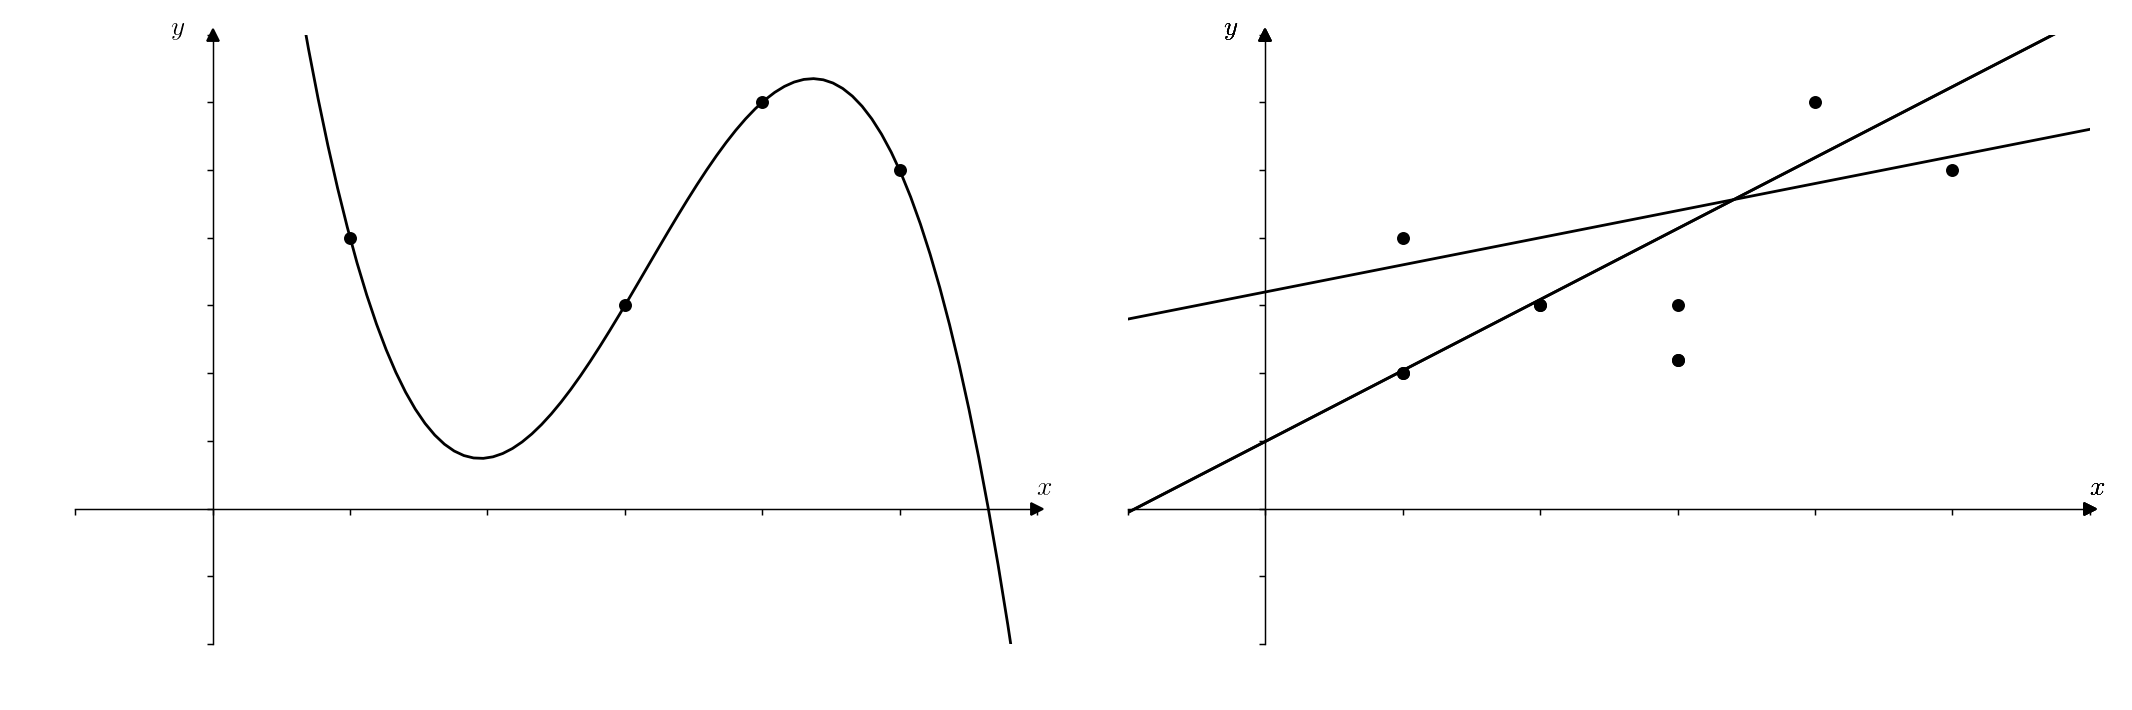

In [33]:
fig,axes=plt.subplots(figsize=(12,4),ncols=2)
fig.tight_layout()

xarray=np.linspace(-1,6,100)
axes[0].plot(xarray,yfunc_lagrange_tot(xarray),color='black',lw=1.5, ls='-')
axes[1].plot(xarray,fit_function(xarray),color='black',lw=1.5, ls='-')

for ax in axes:
    ax.plot(xlist,ylist,color='black',lw=1, ls='', marker='o')


    squareside=3.5
    centerx=2.5
    centery=1
    ax.set_xlim([centerx-squareside,centerx+squareside])
    ax.set_ylim([centery-squareside+1.5,centery+squareside-1])

    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    #ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
    ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
    ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)


#ax.annotate(r'$y=y_0 L_0(x)$', xy=(2.4,0.16),xycoords='data',xytext=(2, -0.5), fontsize=15,
#            textcoords='data',arrowprops=dict(arrowstyle="->",color='C0'),
#            horizontalalignment='center',verticalalignment='center',color='C0')




In [34]:
fig.savefig('../figures/ch4_least_squares_purpose.pdf')

### general method

In [64]:
xlist = [1,2,3,4,7,8,10]
ylist = [.5,2.1,1.1,4,4.9,3.2,6.3]
data=[x for x in zip(xlist,ylist)]
#m, b = least_squares(data,True)
#print(m,b)
m,b=0.5249999999999998,0.5321428571428581
fit_function = lambda x: m*x + b

m2,b2=0,3.6
fit_function2 = lambda x: m2*x + b2


<IPython.core.display.Javascript object>


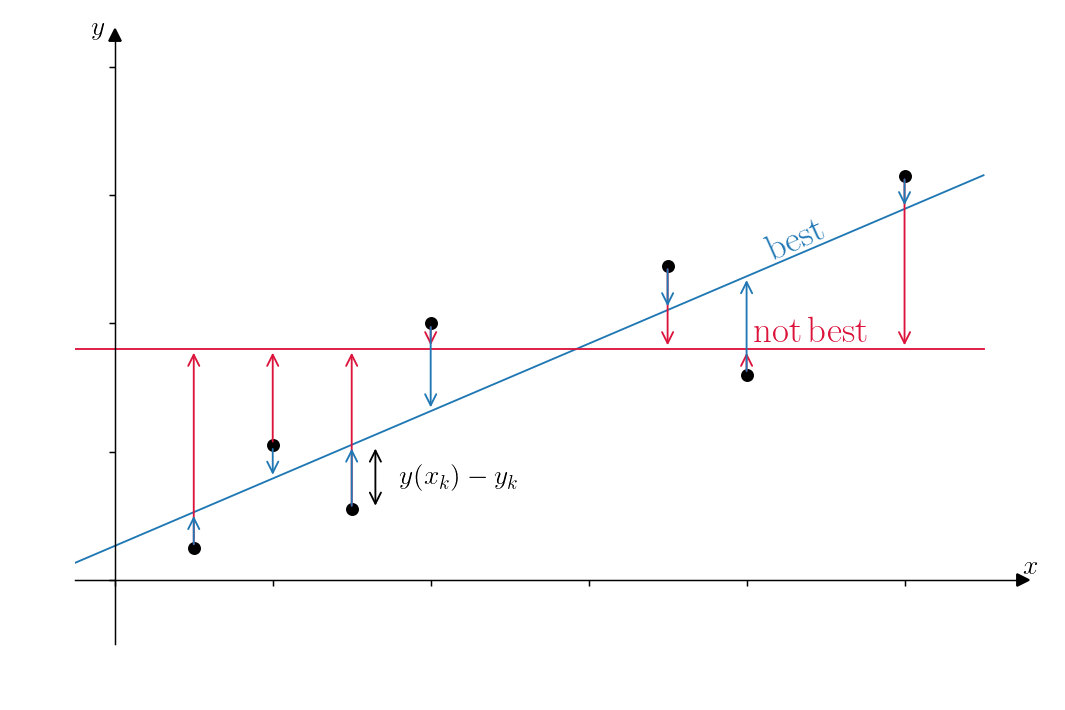

Text(-0.3, 8.5, '$y$')

In [77]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,11,100)

for x,y in zip(xlist,ylist):
    yfit2=fit_function2(x)
    ax.annotate('', xy=(x,yfit2),xycoords='data',xytext=(x,y), fontsize=15,
            textcoords='data',arrowprops=dict(arrowstyle="->",color='crimson'),
            horizontalalignment='center',verticalalignment='center',color='C0')
    
    yfit=fit_function(x)
    ax.annotate('', xy=(x,yfit),xycoords='data',xytext=(x,y), fontsize=15,
            textcoords='data',arrowprops=dict(arrowstyle="->",color='C0'),
            horizontalalignment='center',verticalalignment='center',color='C0')
    
xlab=xlist[2]
ylab=ylist[2]
xoff=0.3
ax.annotate('', xy=(xlab+xoff,fit_function(xlab)),xycoords='data',xytext=(xlab+xoff,ylab), fontsize=15,
        textcoords='data',arrowprops=dict(arrowstyle="<->",color='black'),
        horizontalalignment='center',verticalalignment='center',color='C0')
ax.text(xlab+2*xoff,0.5*(fit_function(xlab) + ylab),r'$y(x_k) - y_k$',ha='left',va='center', fontsize=15)

# line labels
xlab=8.1
ax.text(xlab+0.1,fit_function(xlab+0.1) + 0.15,r'${\rm best}$', fontsize=20, color='C0', rotation=24)
ax.text(xlab,fit_function2(xlab) + 0.1,r'${\rm not \, best}$', fontsize=20, color='crimson')
    
ax.plot(xarray,fit_function(xarray),color='C0',lw=1, ls='-')
ax.plot(xarray,fit_function2(xarray),color='crimson',lw=1, ls='-')
ax.plot(xlist,ylist,color='black',lw=1, ls='', marker='o')

squareside=6
centerx=5.5
centery=3.5
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+1.5,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)







In [78]:
fig.savefig('../figures/ch4_least_squares_defn.pdf')